In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pressure_tools
import os
from cmocean import cm

%matplotlib inline

In [3]:
# Define paths
path = '/data/bmoorema/results/pond/cape'
prefix = 'SalishSeaIdeal_1h_20170701_20170706'
runIDs = ['cape2', 'cape3']

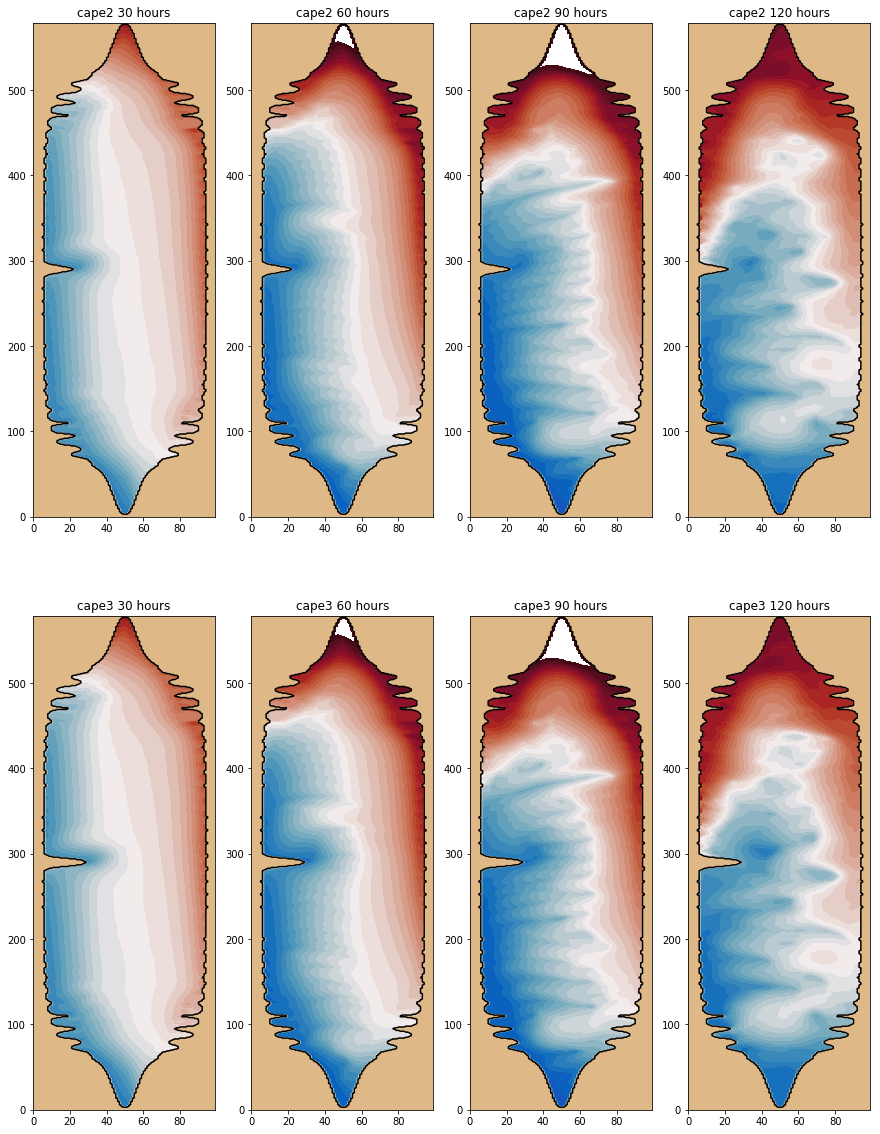

In [14]:
# Plot surface height
fig, axs = plt.subplots(2, 4, figsize=(15, 20))
for row, runID in zip(axs, runIDs):
    mask = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d', 'mesh_mask.nc'))
    T = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d/{prefix}_grid_T.nc'))
    for ax, t in zip(row, [30, 60, 90, 120]):
        ax.contourf(T.x, T.y, T.sossheig[t, ...], levels=np.arange(-0.09, 0.1, 0.005), cmap=cm.balance)
        ax.contourf(T.x, T.y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(T.x, T.y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
        ax.set_title(f'{runID} {t} hours')

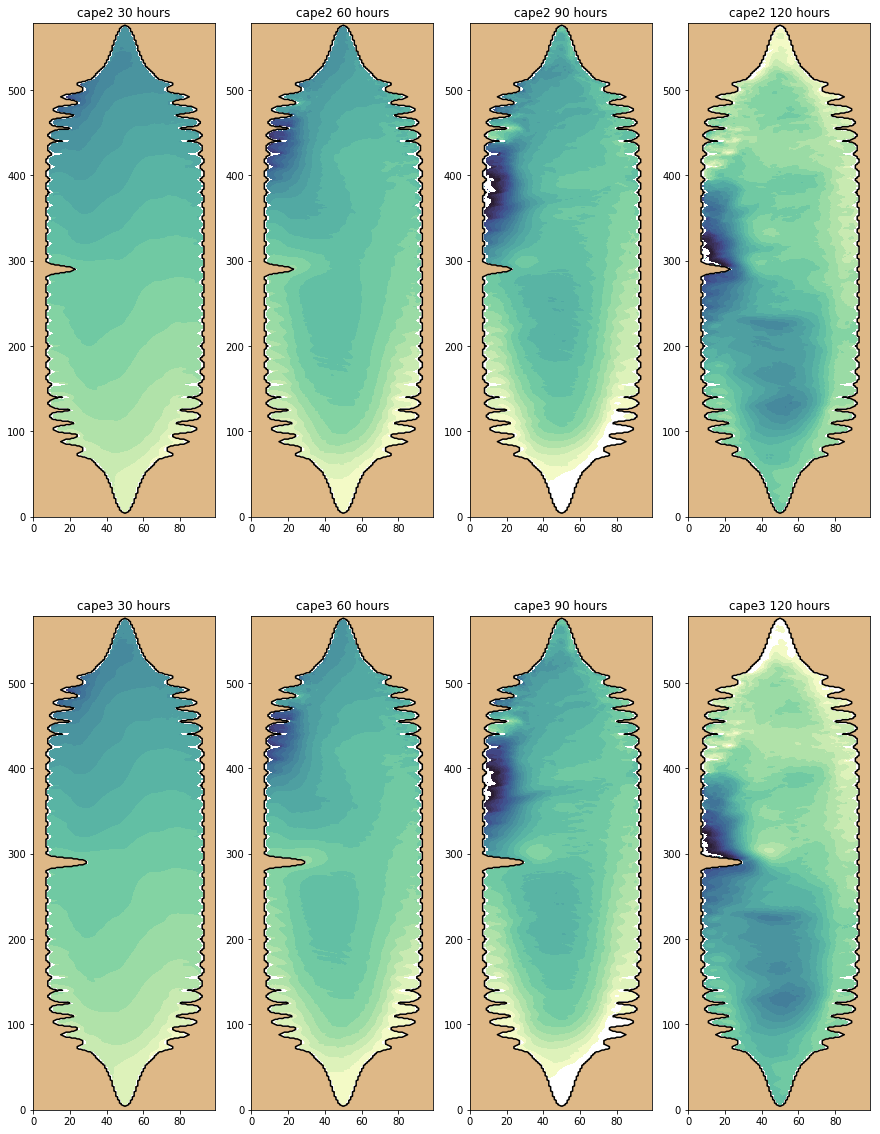

In [7]:
# Plot pressure at 50 m
fig, axs = plt.subplots(2, 4, figsize=(15, 20))
for row, runID in zip(axs, runIDs):
    for ax, t in zip(row, [30, 60, 90, 120]):
        maskfile = os.path.join(path, f'SalishSeaPond_{runID}_S4d', 'mesh_mask.nc')
        params = pressure_tools.load_results(t, os.path.join(path, f'SalishSeaPond_{runID}_S4d'), prefix, maskfile)
        GEO = pressure_tools.calc_geostrophic_velocities(24, params)
        ax.contourf(params['x'], params['y'], GEO['pressure']*1e-4, levels=np.arange(48.978, 49.002, 0.001), cmap=cm.deep)
        ax.contourf(params['x'], params['y'], params['tmask'][22, ...], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(params['x'], params['y'], params['tmask'][22, ...], levels=[-0.01, 0.01], colors='k')
        ax.set_title(f'{runID} {t} hours')

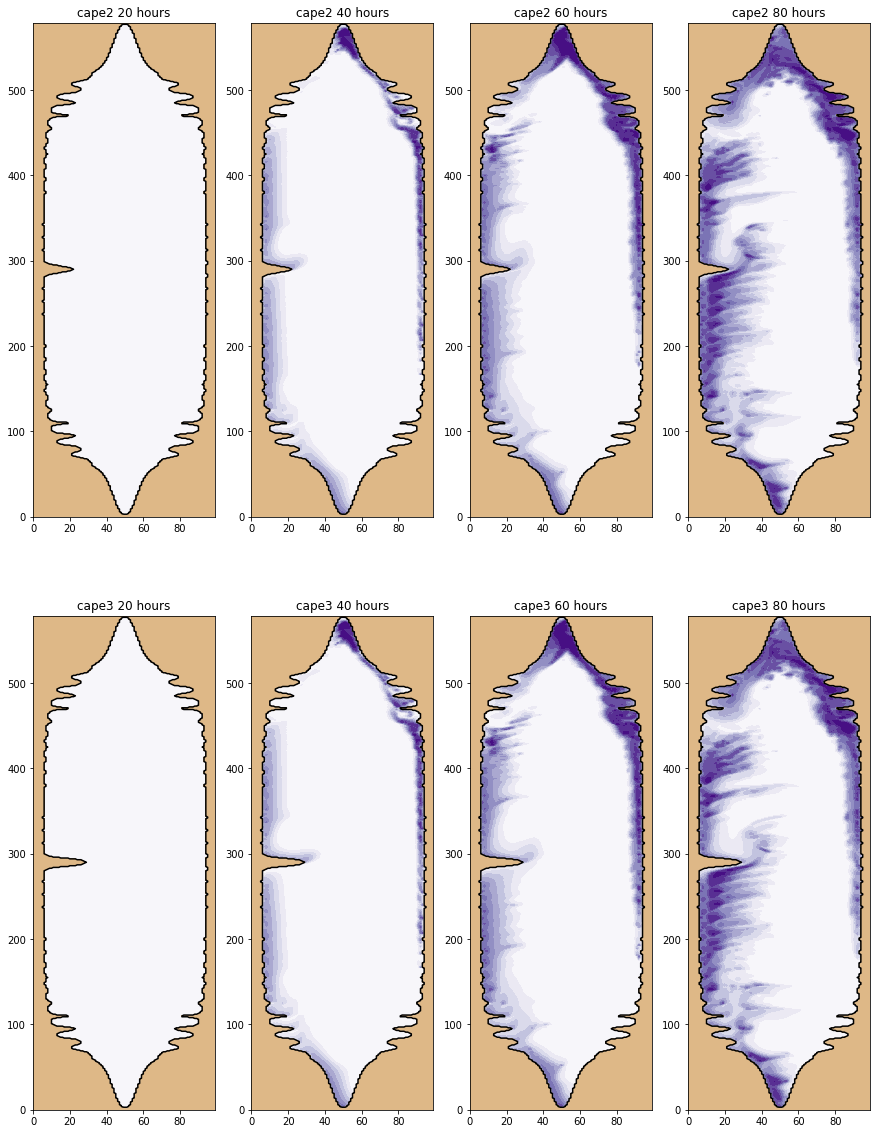

In [21]:
# Plot surface height
fig, axs = plt.subplots(2, 4, figsize=(15, 20))
for row, runID in zip(axs, runIDs):
    mask = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d', 'mesh_mask.nc'))
    T = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d/{prefix}_grid_T.nc'))
    for ax, t in zip(row, [20, 40, 60, 80]):
        ax.contourf(T.x, T.y, T.tracer20m[t, 0, ...], levels=np.arange(0, 1.1, 0.1), cmap=plt.get_cmap('Purples'))
        ax.contourf(T.x, T.y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(T.x, T.y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
        ax.set_title(f'{runID} {t} hours')

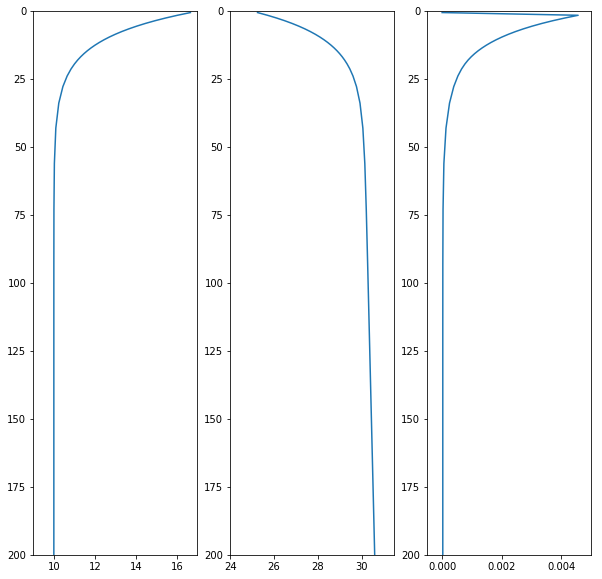

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
for ax, key, xlim in zip(axs, ['votemper', 'vosaline', 'buoy_n2'], ([9, 17], [24, 31.5], [-5e-4, 5e-3])):
    ax.plot(T[key][0, :, 200, 50], T.deptht)
    ax.set_xlim(xlim)
    ax.set_ylim([200, 0])